# Méthode de point intérieur

L'objectif de ce TP est d'utiliser des méthodes de point intérieur pour minimiser une fonction sous contrainte.
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\DeclareMathOperator{\eqdef}{\overset{\tiny def}{=}}$

Soit $f$ une fonction régulière de $\mathbb{R}^n$ dans $\mathbb{R}$, nous nous intéresserons à deux types de problème : 
1. Le problème à contrainte linéaire 
$$
    (\mathcal{P}_{\infty,\text{ lin.}}) \qquad \umin{x\in \mathbb{R}^n, A x \leq b} f(x)
$$
où $A$ est une matrice $\mathcal M_{pn}(\mathbb{R})$ et $b\in \mathbb{R}^p$.
2. Le problème avec **une** contrainte non linéaire
$$
    (\mathcal{P}_{\infty,\text{ non lin.}}) \qquad \umin{x\in \mathbb{R}^n, g(x)\le 0} f(x)
$$
Où $g$ est une fonction régulière de $\mathbb{R}^n$ dans $\mathbb{R}$.


L'idée des méthodes de point intérieur est d'approximer les problèmes $(\mathcal P_{\infty,\bullet})$ en utilisant des [fonctions barrières logarithmiques](https://en.wikipedia.org/wiki/Barrier_function)

$$
	(\mathcal{P}_{t, \text{non-lin.}}) \qquad \umin{x\in \mathbb{R}^d, } f_t(x) \eqdef f(x) - \frac{1}{t} \text{ln}( -g(x)  )
$$
ou 
$$
	(\mathcal{P}_{t, \text{ lin.}}) \qquad \umin{x\in \mathbb{R}^d, } f_t(x) \eqdef f(x) - \frac{1}{t} \text{Log}( b-A x  )
$$
avec
$$
	\text{Log}(u) \eqdef \sum_i \ln(u_i)
$$

Ainsi la fonction -Log ou -log qui est une fonction strictement concave, agit comme une barrière pour la contrainte. On s'attend à ce qu'à la limite, quand $t$ tend vers $+\infty$, le problème $(\mathcal P_{t,\bullet})$ tende vers le problème $(\mathcal P_{\infty,\bullet})$.
## I-Contrainte non-linéaire
On suppose dans cette section que l'on se place dans le cadre d'une seule contrainte non-linéaire.
Si $f$ et $g$ sont données et $f_t=f - \frac{1}{t} \text{log}( -g)$, 
  
<div class="alert alert-block alert-info"> Calculez ci-dessous le gradient et la Hessienne de $f_t$ en fonction des gradients et de la Hessienne de $f$ et de $g$ 
$$\nabla f_t(x) = ?? \quad H [f_t](x) = ?? $$
</div>

On suppose que `f` et `g` sont des fonctions définies avec une classe dans le fichier `functions.py` (ainsi les calculs du gradient ou de la Hessienne de `f` et de `g` sont déjà faits). Créer ci-dessous une classe `non_lin_cst` qui calcule `f_t`, son gradient ou sa Hessienne. La classe prend à la construction la fonction `f`, la fonction `g` et la valeur de `t`. Le constructeur de la classe est déjà implémenté.
Attention, dans le cas où `g(x)` est $>0$, la fonction `value(self,x)` doit rendre `np.inf` et ne doit pas rendre une erreur.

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import functions as func
import Optim as opt

In [18]:
class non_lin_cst() :
    def __init__(self,f,g,t) :
        self.zeros()
        self.f=f
        self.g=g
        self.t=t
        self.nb_constraints=1. # nombre de contraintes du problème
    def zeros(self) :
        self.nb_eval=0 # number of evaluations of the function self.value()
        self.nb_grad=0 # number of evaluations of the function self.grad()
        self.nb_hess=0 # number of evaluations of the function self.Hess()
    def value(self,x) :
        if self.g.value(x) > 0:
            return np.inf
        else:
            self.nb_eval += 1
            return self.f.value(x) - (1/self.t)*np.log(-self.g.value(x))
        return None
    def grad(self,x) :
        self.nb_grad += 1
        return self.f.grad(x) - (1/self.t)*self.g.grad(x)/self.g.value(x)
    def Hess(self,x) :
        self.nb_hess += 1
        grad_g = self.g.grad(x).reshape(-1,1)
        return self.f.Hess(x) + (1/self.t)*(-self.g.Hess(x)/self.g.value(x) +  grad_g@grad_g.T  /self.g.value(x)**2)

Afin de tester notre classe, on utilise comme `f` la fonction Rosenbrock et comme `g` la fonction `square2` définie ci-dessous :


In [19]:
class square2() :
    def __init__(self) :
        self.zeros()
    def zeros(self) :
        self.nb_eval=0 # number of evaluations of the function self.value()
        self.nb_grad=0 # number of evaluations of the function self.grad()
        self.nb_hess=0 # number of evaluations of the function self.Hess()
    def value(self,x) :
        # returns the value of the function at point x
        self.nb_eval+=1
        return 0.5*x[0]**2+7/2.*x[1]**2-1
    def grad(self,x) :
        # returns the gradient of the function at point x
        self.nb_grad+=1
        return np.array([x[0],7*x[1]])
    def Hess(self,x) :
        # returns the Hessian of the function at point x
        self.nb_hess+=1
        to_return=np.zeros((2,2))
        to_return[0,0]=1
        to_return[1,1]=7
        return to_return
f_t=non_lin_cst(func.Rosen(),square2(),0.33)
x_0=np.array([0.,0.])
print('Doit être 1.0=',f_t.value(x_0))
x_0=np.array([0.2,0.12])
print('Doit être 1.5012148269226977=',f_t.value(x_0))
x_0=np.array([2,1.3])
print('Doit être inf =',f_t.value(x_0))
print('######## TEST DE DERIVEE NUMERIQUE')
a=np.array([0.2,0.12])
d=np.random.randn(2)
opt.deriv_num(f_t,a,d)

Doit être 1.0= 1.0
Doit être 1.5012148269226977= 1.5012148269226977
Doit être inf = inf
######## TEST DE DERIVEE NUMERIQUE
eps 1.0e-01 grad 1.2e+00 ratio 9.5e-02 angle 1.2e-03
eps 1.0e-02 grad 1.1e-01 ratio 5.1e-03 angle 2.8e-05
eps 1.0e-03 grad 1.1e-02 ratio 4.9e-04 angle 3.0e-07
eps 1.0e-04 grad 1.1e-03 ratio 4.8e-05 angle 3.0e-09
eps 1.0e-05 grad 1.1e-04 ratio 4.8e-06 angle 3.0e-11
eps 1.0e-06 grad 1.1e-05 ratio 4.8e-07 angle 3.0e-13
eps 1.0e-07 grad 1.1e-06 ratio 4.8e-08 angle 3.0e-15
eps 1.0e-08 grad 1.1e-07 ratio 5.8e-09 angle 3.3e-16
eps 1.0e-09 grad 2.0e-10 ratio 6.3e-10 angle 1.1e-16
eps 1.0e-10 grad 1.1e-07 ratio 2.1e-08 angle 5.6e-16
eps 1.0e-11 grad 1.1e-07 ratio 9.4e-07 angle 1.7e-14
eps 1.0e-12 grad 3.1e-06 ratio 6.0e-06 angle 9.7e-15


## Algorithme d'optimisation
Vous devez récupérer votre algorithme de Newton ainsi que la recherche linéaire de Wolfe (avec un step initial de $1$ ) dans la cellule ci-dessous.

In [20]:
def ls_wolfe(x,function,step,descent,f,df) :
    e1 = 1e-7
    e2 = 0.9
    sl = 0
    sh = 10000
    step2 = step
    while True:
        if function.value(x + step2*descent) > f + e1*step2*np.dot(df,descent):
            sh = step2
            step2 = (sl + sh)/2
        elif np.dot(function.grad(x+step2*descent),descent) < e2*np.dot(df,descent):
            sl = step2
            if sh < 10000:
                step2 = (sl + sh)/2
            else:
                step2 = 2*step2
        else:
            x2 = step2*descent + x
            f2 = function.value(x2)
            df2 = function.grad(x2)
            return x2,f2,df2,step2
    
def ls_wolfe_step_is_one(x,function,step,descent,f,df) :
    return ls_wolfe(x,function,1.,descent,f,df)

    
def dc_Newton(x,function,df) :
    descent = np.matmul(np.linalg.inv(function.Hess(x)),-df)
    c = np.dot(descent,-df)/(np.linalg.norm(descent)*np.linalg.norm(df))
    if c > 0.1:
        return descent
    else:
        return -df


On peut maintenant lancer une optimisation en utilisant la méthode de Newton avec un pas de Wolfe initialisé à $1$.

In [21]:
f_t=non_lin_cst(func.Rosen(),square2(),0.33)
res=opt.main_algorithm(f_t,5,np.array([0,0]),dc_Newton,ls_wolfe_step_is_one,tol=1.e-7,verbose=True)
final_x=res['list_x'][-1]
print('x final=',final_x)
# VOUS DEVEZ TROUVER
#Fonction de Rosenbrock
#Fonction (x,y) --> x^2/2+7/2*y^2-1
#Fonction Interior point method
#iter=   0 f=1.000e+00 df=2.000e+00 comp=[   1,   1,   0]
#iter=   1 f=8.586e-01 df=8.192e+00 comp=[   3,   2,   1]
#iter=   2 f=7.028e-01 df=3.443e-01 comp=[   4,   3,   2]
#iter=   3 f=6.973e-01 df=2.196e-01 comp=[   5,   4,   3]
#iter=   4 f=6.972e-01 df=1.166e-03 comp=[   6,   5,   4]
#iter=   5 f=6.972e-01 df=6.426e-07 comp=[   7,   6,   5]
#iter=   6 f=6.972e-01 df=3.988e-14 comp=[   8,   7,   6]
#Success !!! Algorithm converged !!!
#x final= [0.25636244 0.05915168]

iter=   0 f=1.000e+00 df=2.000e+00 comp=[   1,   1,   0]
iter=   1 f=8.586e-01 df=8.192e+00 comp=[   4,   3,   1]
iter=   2 f=7.028e-01 df=3.443e-01 comp=[   6,   5,   2]
iter=   3 f=6.973e-01 df=2.196e-01 comp=[   8,   7,   3]
iter=   4 f=6.972e-01 df=1.166e-03 comp=[  10,   9,   4]
iter=   5 f=6.972e-01 df=6.426e-07 comp=[  12,  11,   5]
iter=   6 f=6.972e-01 df=3.808e-14 comp=[  14,  13,   6]
Success !!! Algorithm converged !!!
x final= [0.25636244 0.05915168]


## La méthode du chemin central
Notre objectif est d'envoyer le paramètre $t$ vers $+\infty$. Pour ce faire on va suivre la méthode du chemin central, nous commençons par nous donner $t_1$ et nous notons $x_0$ le point initial et $x_1$ le minimiseur donné de $f_{t_1}$ par une méthode de Newton commençant à $x_0$. Ensuite nous multiplions $t_1$ par $\mu$ pour obtenir $t_2$ et nous lançons une méthode de Newton commençant à $x_1$. On note $x_2$ le résultat obtenu. 
Ainsi nous allons construire une suite de points solutions du problème 
$$x_k \in \textrm{argmin} f_{t_k}(x).$$
avec $t_{k}=\mu t_{k-1}$ et $x_{k}$ une solution donnée par un algorithme de Newton (avec recherche de Wolfe) et avec comme point de départ $x_{k-1}$. L'idée d'utiliser comme initialisation la solution d'un problème d'optimisation s'appelle "warm restart".

On peut montrer que l'erreur que l'on fait entre $x_k$ et $x^\star$ (où $x^\star$ est le minimum de $f$) vérifie :
$$ 0 \le f(x_k)-f(x^\star)\le \frac{p}{t_k},$$
où $p$ est le nombre de contraintes. Ainsi on va s'arrêter dès que $\varepsilon t_k > p$ où $\varepsilon$ est la précision de l'algorithme de Newton.
Ecrire une fonction `def central_path(function,mu,varepsilon,x0)` qui implémente cette stratégie. Elle prend en argument 
 1. `function`: une instance de la classe `non_lin_cst`
 2. `mu`: un réel $>1$ qui est le facteur multiplicatif de `t`
 3. `varepsilon`: une précision
 4. `x0`: un point de départ de la méthode
 
Cette fonction doit rendre `costs,x` où

1. `costs` est la liste des coûts pour toutes les itérations
2. `x` est le point final d'arrivée

On rappelle que la valeur de $p$ se trouve dans `function.nb_constraints` tandis que la valeur de $t$ se trouve dans `function.t`

In [53]:
def central_path(function,mu,varepsilon,x0) :
    x = x0
    costs = []
    while varepsilon*function.t <= function.nb_constraints:
        res = opt.main_algorithm(function,5,x,dc_Newton,ls_wolfe_step_is_one,tol=1.e-4,verbose=False)
        x=res['final_x']
        function.t = mu*function.t
        costs += res['list_costs']
    return costs, x

f_t=non_lin_cst(func.Rosen(),square2(),10)
costs,x=central_path(f_t,10,1.e-9,np.array([0,0]))
cost_min=np.min(costs)
print('minimal value ',cost_min) # minimal value  0.0994618583079908
print('x',x) # x [0.68525439 0.46758135]

minimal value  0.09946170477872637
x [0.68525434 0.46758139]


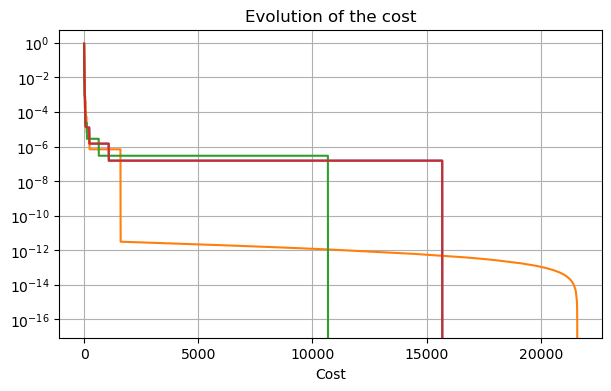

In [57]:
mu_list = [10,20,50,100]
plt.figure(figsize=(7,4))
for mu in mu_list:
    f_t=non_lin_cst(func.Rosen(),square2(),mu)
    costs,x=central_path(f_t,10,1.e-9,np.array([0,0]))
    cost_min=np.min(costs)
    plt.plot(costs - cost_min)
plt.xscale('log')
plt.xlabel('Cost')
plt.title('Evolution of the cost')
plt.grid()
plt.show()

Vous pouvez tracer l'évolution des coûts en échelle log et exhiber la convergence linéaire de ces algorithmes
<div class="alert alert-block alert-info"> METTEZ ICI VOTRE ARGUMENT POUR JUSTIFIER DE LA CONVERGENCE LINEAIRE DE CET ALGORITHME
</div>

In [24]:
Logique car on multiplie chaque fois par 10 le coût (t)

SyntaxError: invalid syntax (1306200897.py, line 1)

On va maintenant s'intéresser à l'influence de $\mu$. On fixe maintenant `varepsilon` à $10^{-6}$ et on va tracer la courbe d'évolution de la fonction à minimiser (en échelle log, et en traçant la fonction auquelle on a retiré `costmin`) pour différentes valeurs de $\mu$ dans `mu_list` ci-dessous. La valeur de `cost_min` est inchangée et est la valeur trouvée pour `varepsilon` à $10^{-9}$.

In [ ]:
mu_list=[2,4,10,100,1000,5000]

Voyez-vous une grande différence quand $\mu$ varie ?
<div class="alert alert-block alert-info"> METTEZ ICI VOTRE ARGUMENT 
</div>

## Problème avec multiples contraintes linéaires
On s'intéresse maintenant aux problèmes de la forme
$$
	(\mathcal{P}_{t, \text{ lin.}}) \qquad \umin{x\in \mathbb{R}^d, } f_t(x) \eqdef f(x) - \frac{1}{t} \text{Log}( b-A x  ),
$$
qui approximent, quand $t$ tend vers $+\infty$ des problèmes du genre
$$
    (\mathcal{P}_{\infty,\text{ lin.}}) \qquad \umin{x\in \mathbb{R}^n, A x \leq b} f(x)
$$

<div class="alert alert-block alert-info"> Calculez ci-dessous le gradient et la Hessienne de $f_t$ en fonction de $A$,$b$,t et du gradient et de la Hessienne de $f$  
$$\nabla f_t(x) = ?? \quad H[f_t](x) = ?? $$
</div>

Créez une classe de fonction `class lin_cst()` qui prend au constructeur la fonction `f`, la matrice `A`, le vecteur `b` le scalaire `t` et  et qui calcule la valeur de $f_t$. Cette fonction devra agir comme `class non_lin_cst()` et notamment avoir un attribut `nb_constraints`

In [39]:
class lin_cst() :
    def __init__(self,f,A,b,t) :
        self.zeros()
        self.f=f
        self.A=A
        self.b=b
        self.t=t
        self.n = b.shape[0]
        self.nb_constraints=1.
    def zeros(self) :
        self.nb_eval=0
        self.nb_grad=0
        self.nb_hess=0
    def value(self,x) :
        self.nb_eval += 1
        g=A@x - b
        l=0*g
        l[g>=0]=np.inf
        l[g<0]=-np.log(-g[g<0])
        return self.f.value(x) + l.sum()/self.t    
    def grad(self,x) :
        self.nb_grad += 1
        tmp=1./self.t*self.A.T@(1./(self.b-self.A@x))
        return self.f.grad(x) + tmp   
        
    def Hess(self,x) :
        self.nb_hess += 1
        tmp = 1./self.t*self.A.T*(1./(self.b-self.A@x)**2)@self.A
        return self.f.Hess(x) + tmp

In [40]:
u = np.array([1,2])
u.shape[0]

2

On va tester notre fonction dans la case ci-dessous

In [41]:
np.random.seed(42)
x=np.zeros(2)
n=10
A=np.random.randn(42,2)
b=np.abs(np.random.randn(42))
x2=np.random.randn(2)
f_t=lin_cst(func.Rosen(),A,b,10)
print(f_t.value(x),f_t.value(x2)) ## 4.717787999246487 inf
print(f_t.grad(x),f_t.grad(x2)) ## [-9.36529883 -1.43185282] [-624.84901174 -313.83869195]
print(f_t.Hess(x)) ## [[1624.61765301  896.38712898] [ 896.38712898  871.39523753]]
print(f_t.Hess(x2)) ## [[2531.87148488  934.54404056][ 934.54404056  476.99362034]]

print('## TEST DE DERIVEE NUMERIQUE##')
d=np.random.randn(2)
opt.deriv_num(f_t,5.e-3*x2,d)

4.717787999246487 inf
[-9.36529883 -1.43185282] [-624.84901174 -313.83869195]
[[1624.61765301  896.38712898]
 [ 896.38712898  871.39523753]]
[[2531.87148488  934.54404056]
 [ 934.54404056  476.99362034]]
## TEST DE DERIVEE NUMERIQUE##
eps 1.0e-01 grad inf ratio 8.1e-01 angle 2.0e+00
eps 1.0e-02 grad 8.3e-01 ratio 1.9e+00 angle 4.8e-04
eps 1.0e-03 grad 4.9e-02 ratio 6.8e-02 angle 4.7e-06
eps 1.0e-04 grad 4.7e-03 ratio 6.4e-03 angle 4.7e-08
eps 1.0e-05 grad 4.7e-04 ratio 6.3e-04 angle 4.7e-10
eps 1.0e-06 grad 4.7e-05 ratio 6.3e-05 angle 4.7e-12
eps 1.0e-07 grad 4.7e-06 ratio 6.3e-06 angle 4.7e-14
eps 1.0e-08 grad 4.8e-07 ratio 6.3e-07 angle 3.3e-16
eps 1.0e-09 grad 6.0e-08 ratio 6.5e-08 angle 2.2e-16
eps 1.0e-10 grad 8.4e-07 ratio 3.6e-08 angle 1.1e-16
eps 1.0e-11 grad 1.5e-05 ratio 2.8e-07 angle 1.0e-13
eps 1.0e-12 grad 7.7e-05 ratio 8.7e-06 angle 1.0e-15


On s'intéresse maintenant au problème particulier du [Lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)), pour retrouver un signal parcimonieux. Le problème du Lasso s'écrit $$
        \umin{w \in \mathbb{R}^p} \frac{1}{2}\Vert Bw-y \Vert_2^2 + \lambda \Vert x \Vert_1
$$
On suppose ici qu'on veut retrouver un signal $w_0$ que l'on sait être parcimonieux (beaucoup de coefficients nuls), quand on n'observe que $y=Bw_0+N$ où $B$ est l'opérateur d'observation dans $ \mathbb{R}^{n \times p}$ avec $n<<p$ et $N$ est un bruit.  On va supposer ici que $B$ est une matrice aléatoire Gaussienne, ce qui pose notre problème dans le cadre du [compressed sensing](https://en.wikipedia.org/wiki/Compressed_sensing).

In [ ]:
n = 40
p = 60
np.random.seed(42)
B = np.random.randn(n,p)

On crée `w0` le vecteur que l'on souhaite retrouver, qui est parcimonieux et on génère le signal $y=Bw_0+N$ où $N$ est un bruit gaussien additif. 

In [ ]:
np.random.seed(42)
w0 = np.zeros(p) 
I=(p*np.random.rand(4)).astype(int)
print(I)
w0[I] = np.array([.8, -.6, .7, -.9])
N = np.random.randn(n)*np.max(np.abs(B@w0))*.02
y = (B@w0) + N

On fixe $\lambda = \frac{\lambda_{\max}}{10}$ où $\lambda_{\max} = \Vert B^\top y \Vert_\infty$ est la valeur limite du paramètre pour laquelle on peut montrer que la solution du problème du Lasso est nulle.

In [ ]:
lam = np.max(np.abs(B.T @ y))/10

On donne aussi un exemple d'utilisation de la fonction `stem` de matplotlib, utile pour représenter les vecteurs parcimonieux.

In [ ]:
plt.stem( w0, linefmt='--k', markerfmt='ko', label='$x_0$' )
plt.legend()
plt.show()

Afin de re-écrire le problème du Lasso comme un problème d'optimisation lisse sans contrainte, on introduit, pour tout vecteur $w\in \mathbb{R}^p$, on  introduit le vecteur $x=(x_-,x_+)$ tel que $x_-=\max(-w,0)$ et $x_+=\max(w,0)$. On a ainsi toujours 
$$w = x_+ - x_-\quad \text{et}\quad |w|=x_++x_-\quad \text{et}\quad x\ge 0.$$
Le problème revient donc à minimiser, sous la contrainte $x\ge 0$ et en décomposant $x=(x_+,x_-)$
$$ 
    f(x) = \frac{1}{2}\Vert B(x_+-x_-)-y\Vert_2^2 + \lambda \langle x,1\rangle,
$$ 
où $1$ est le vecteur rempli de $1$. Ainsi la contrainte s'écrit bien $Ax \le b$ avec
$A=-\text{Id}_{2p}$, $b=0$.
<div class="alert alert-block alert-info"> Calculez ci-dessous le gradient et la Hessienne de $f$ en fonction de $B,y,\lambda$ et de $x=(x_-,x_+)$  
$$\nabla f(x) = ?? \quad H[f](x) = ?? $$
</div>


Remplissez une classe `class lasso()` qui prend au constructeur `B`, `lam` et `y` qui valent respectivement $B$, $\lambda$ et $y$. Cette classe doit vous calculer $f(x)$, $\nabla f(x)$ ainsi que la Hessienne dans les fonctions idoines.

In [ ]:
class lasso() :
    def __init__(self,B,lam,y) :
        pass
    def zeros(self) :
        pass
    def value(self,x) :
        pass
    def grad(self,x) :
        pass
    def Hess(self,x) :
        pass
f=lasso(B,lam,y)
np.random.seed(42)
x=np.random.randn(2*p)
d=np.random.randn(2*p)
print('## TEST DE LA FONCTION##')
print(f.value(x))                         # 3576.442886034992
print(f.grad(x).shape,f.grad(x)[3:6])     # (120,) [ 247.688236   -146.62731787  -37.53567201]
print(f.Hess(x).shape,f.Hess(x)[15][3:6]) # (120, 120) [4.15670644 6.06401088 6.55285271]
print('## TEST DE DERIVEE NUMERIQUE##')
opt.deriv_num(f,x,d)


Utilisez les classes `lin_cst` et `lasso` définies au dessus pour résoudre le problème du Lasso avec une méthode de Newton, une précision de $10^{-8}$, en partant du point $x_0=1$ pour les différentes valeurs de `t` données dans le tableau `tlist` ci-dessous. Vous afficherez pour chaque `t` le vecteur $w_0$ et sa reconstruction en utilisant le module `plt.stem` donné plus haut dans le notebook. Que remarquez vous sur la solution ? Pouvez-vous l'expliquer ?
<div class="alert alert-block alert-info"> VOTRE REPONSE CI-DESSOUS
</div>

In [ ]:
tlist = np.array([1, 10, 100, 1000])

Testez ci-dessous la fonction `central_path`. Vous mettrez une tolérance de $10^{-5}$.

Pour les différentes valeurs de `lam_list` donnez ci-dessous, lancez l'algorithme d'optimisation `central_path` pour résoudre le problème du Lasso. vous mettrez une tolérance de $10^{-4}$. Que remarquez-vous quand $\lambda$ var

In [ ]:
lam_list = np.array([0.01*lam, 0.1*lam, lam,4*lam])